# Titanic challenge

## Import bibliotek

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Zaimportujmy najpierw dane

In [2]:
df = pd.read_csv('train.csv')
display(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Sprawdźmy ile mamy pustych wartości

In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Przeprowadźmy teraz imputacje brakujących danych

In [4]:
pc1med = df.query('Pclass == 1')['Age'].median()
pc2med = df.query('Pclass == 2')['Age'].median()
pc3med = df.query('Pclass == 3')['Age'].median()
def fill_age_based_on_criteria(row):
    age = row['Age']
    pclass = row['Pclass']
    if pd.isnull(age):
        if pclass == 1:
            return pc1med
        elif pclass == 2:
            return pc2med
        else:
            return pc3med
    else:
        return age

df['Age'] = df.apply(fill_age_based_on_criteria, axis=1)
print(pc1med, pc2med, pc3med)

37.0 29.0 24.0


In [5]:
display(df)
df.isnull().sum()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Następnie pozbędziemy się kolumny z Kabiną ponieważ zbyt wiele wartości jest pustych, a jako że zawiera ona dane tekstowe to ciężko zapłełnić je miarodajnymi wartościami

In [6]:
df = df.drop(columns='Cabin')

In [7]:
display(df)
df.isnull().sum()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

Finalnie należy zająć się kolumną Embarked

In [8]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].value_counts().idxmax())

In [9]:
display(df)
df.isnull().sum()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Następnie musimy zmapować dane tekstowe na liczbowe oraz pozbyć się tych, które ciężko będzie zmappować

In [10]:
df = df.drop(columns=['Name', 'Ticket'])
mapping_dict = {'male': 0, 'female': 1, 'S': 0, 'Q': 1, 'C': 2}
df['Sex'] = df['Sex'].map(mapping_dict)
df['Embarked'] = df['Embarked'].map(mapping_dict)
display(df)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,2
2,3,1,3,1,26.0,0,0,7.9250,0
3,4,1,1,1,35.0,1,0,53.1000,0
4,5,0,3,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000,0
887,888,1,1,1,19.0,0,0,30.0000,0
888,889,0,3,1,24.0,1,2,23.4500,0
889,890,1,1,0,26.0,0,0,30.0000,2


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing  import (
    MaxAbsScaler,
    MinMaxScaler,
    Normalizer,
    PowerTransformer,
    QuantileTransformer,
    RobustScaler,
    StandardScaler
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(df, df['Survived'], test_size=0.2, random_state=42)
scaler = MinMaxScaler()
classifier = KNeighborsClassifier(n_neighbors=5)

In [12]:
from sklearn.metrics import accuracy_score
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
scaler.fit(X_train[features])
train_data = scaler.transform(X_train[features])
classifier.fit(train_data, y_train)

test_data = scaler.transform(X_test[features])
output = classifier.predict(test_data)

accuracy = accuracy_score(y_test, output)
print("Accuracy:", accuracy)

Accuracy: 0.8268156424581006


W celu poprawiania wyników przewidywania zobaczmy w podstawowy sposób jak bardzo zozłożone są dane w każdej z kolumn

In [13]:
df.describe().T.drop(columns='count')

,mean,std,min,25%,50%,75%,max
PassengerId,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Sex,0.352413,0.477990,0.00,0.0000,0.0000,1.0,1.0000
Age,29.066409,13.244532,0.42,22.0000,26.0000,37.0,80.0000
SibSp,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292
Embarked,0.463524,0.791503,0.00,0.0000,0.0000,1.0,2.0000


Należy zwrócić uwagę na to, że w przypapdku Fare oraz Age mająbardzo duży rozstrzał danych i należało by jakoś je skategoryzować w tym celu obejrzymy najpierw rozkład tych danych na wykresach

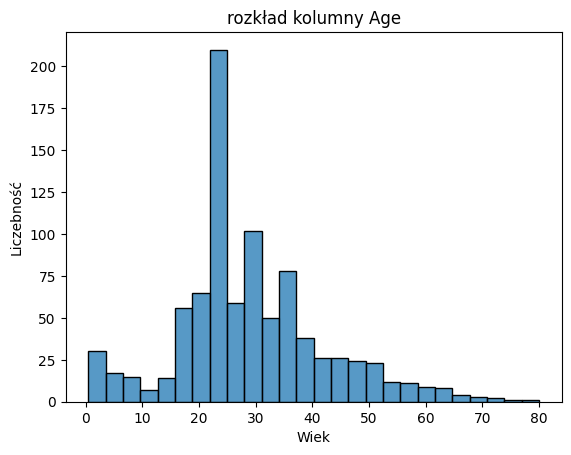

In [14]:
sns.histplot(df['Age'])

plt.title('rozkład kolumny Age')
plt.xlabel('Wiek')
plt.ylabel('Liczebność')

plt.show()

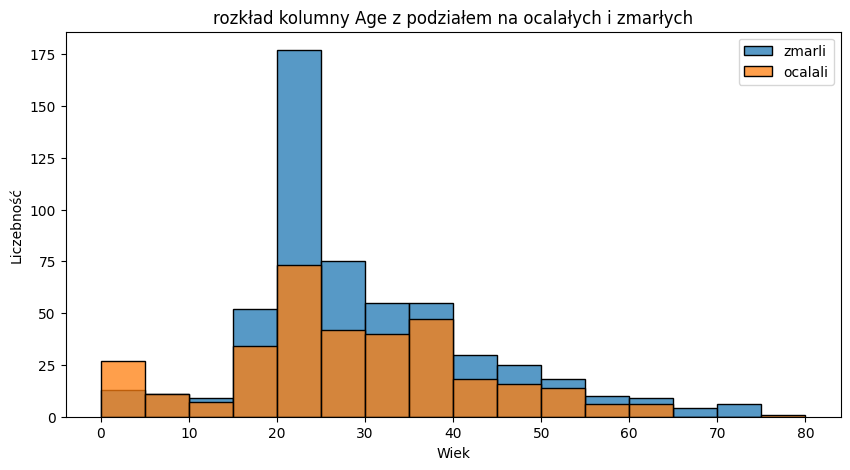

In [15]:
age_of_dead = df.query('Survived == 0')['Age']
age_of_alive = df.query('Survived == 1')['Age']
age_bins = np.arange(0, 81, 5)
age_labels = np.arange(0, len(age_bins)-1, 1)

f, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.histplot(ax=ax, bins=age_bins, data=age_of_dead, label='zmarli')
sns.histplot(ax=ax, bins=age_bins, data=age_of_alive, label='ocalali')
_ = plt.legend()

plt.title('rozkład kolumny Age z podziałem na ocalałych i zmarłych')
plt.xlabel('Wiek')
plt.ylabel('Liczebność')

plt.show()

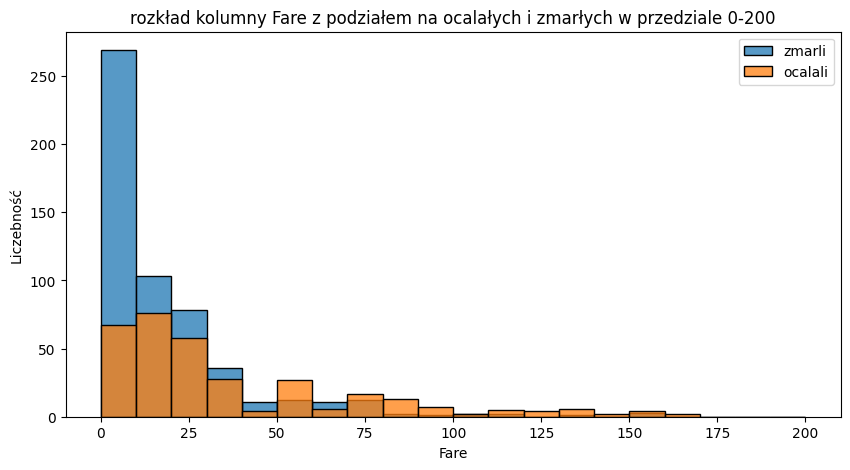

In [16]:
fare_of_dead = df.query('Survived == 0')['Fare']
fare_of_alive = df.query('Survived == 1')['Fare']
bins = np.arange(0, 201, 10)

f, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.histplot(ax=ax, bins=bins, data=fare_of_dead, label='zmarli')
sns.histplot(ax=ax, bins=bins, data=fare_of_alive, label='ocalali')
_ = plt.legend()

plt.title('rozkład kolumny Fare z podziałem na ocalałych i zmarłych w przedziale 0-200')
plt.xlabel('Fare')
plt.ylabel('Liczebność')

plt.show()

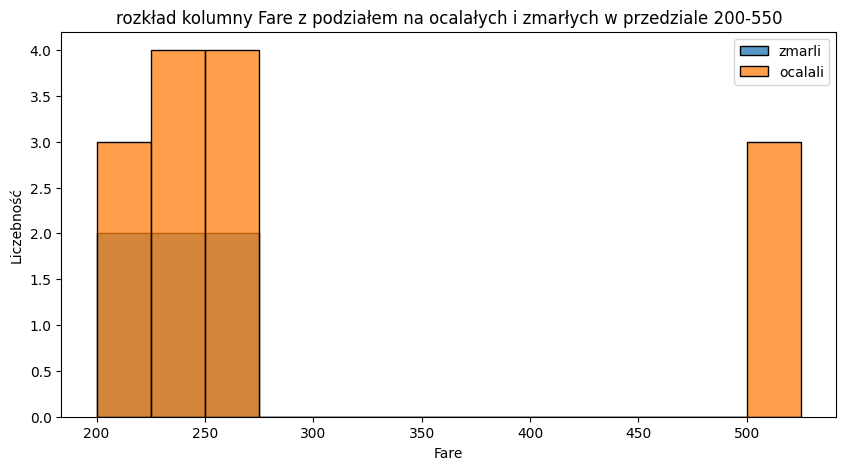

In [17]:
fare_of_dead = df.query('Survived == 0')['Fare']
fare_of_alive = df.query('Survived == 1')['Fare']
bins = np.arange(200, 550, 25)

f, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.histplot(ax=ax, bins=bins, data=fare_of_dead, label='zmarli')
sns.histplot(ax=ax, bins=bins, data=fare_of_alive, label='ocalali')
_ = plt.legend()

plt.title('rozkład kolumny Fare z podziałem na ocalałych i zmarłych w przedziale 200-550')
plt.xlabel('Fare')
plt.ylabel('Liczebność')

plt.show()

In [18]:
df['Age_group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)
df['Age_group'] = df['Age_group'].fillna(df['Age_group'].max()+1)
display(df)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_group
0,1,0,3,0,22.0,1,0,7.2500,0,4
1,2,1,1,1,38.0,1,0,71.2833,2,7
2,3,1,3,1,26.0,0,0,7.9250,0,5
3,4,1,1,1,35.0,1,0,53.1000,0,7
4,5,0,3,0,35.0,0,0,8.0500,0,7
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000,0,5
887,888,1,1,1,19.0,0,0,30.0000,0,3
888,889,0,3,1,24.0,1,2,23.4500,0,4
889,890,1,1,0,26.0,0,0,30.0000,2,5


In [19]:
X_train, X_test, y_train, y_test = train_test_split(df, df['Survived'], test_size=0.2, random_state=42)
scaler = MinMaxScaler()
classifier = KNeighborsClassifier(n_neighbors=5)

In [23]:
features = ['Pclass', 'Sex', 'Age_group', 'SibSp', 'Parch', 'Fare', 'Embarked']
scaler.fit(X_train[features])
train_data = scaler.transform(X_train[features])
classifier.fit(train_data, y_train)

test_data = scaler.transform(X_test[features])
output = classifier.predict(test_data)

accuracy = accuracy_score(y_test, output)
print("Accuracy:", accuracy)

Accuracy: 0.8212290502793296


In [21]:
# kNeighborsClassifier = KNeighborsClassifier(n_neighbors=5)
# sVC = SVC(
#     kernel="linear",
#     C=0.025,
#     random_state=42
# )
# gaussianProcessClassifier = GaussianProcessClassifier(
#     1.0 * RBF(1.0),
#     random_state=42
# )
# decisionTreeClassifier = DecisionTreeClassifier(
#     max_depth=5,
#     random_state=42
# )
# randomForestClassifier = RandomForestClassifier(
#     max_depth=5, 
#     n_estimators=10, 
#     max_features=1, 
#     random_state=42
# )
# mLPClassifier = MLPClassifier(
#     alpha=1, 
#     max_iter=712, 
#     random_state=42
# )
# adaBoostClassifier = AdaBoostClassifier(
#     algorithm="SAMME", 
#     random_state=42
# )
# gaussianNB = GaussianNB()
# quadraticDiscriminantAnalysis = QuadraticDiscriminantAnalysis()

# classifiers = [
#     kNeighborsClassifier,
#     sVC,
#     gaussianProcessClassifier,
#     decisionTreeClassifier,
#     randomForestClassifier,
#     mLPClassifier,
#     adaBoostClassifier,
#     gaussianNB,
#     quadraticDiscriminantAnalysis
# ]

# maxAbsScaler = MaxAbsScaler()
# minMaxScaler = MinMaxScaler()
# normalizer = Normalizer()
# powerTransformer = PowerTransformer()
# quantileTransformer = QuantileTransformer()
# robustScaler = RobustScaler()
# standardScaler = StandardScaler()

# scalers = [maxAbsScaler, minMaxScaler, normalizer, powerTransformer, quantileTransformer, robustScaler, standardScaler]

# score_df = pd.DataFrame()
# scaler_names = []
# for s in scalers:
#     scaler_name = [name for name, value in globals().items() if value is s]
#     scaler_names.append(scaler_name[0])
    
# for cl in classifiers:
#     classifier_name = [name for name, value in globals().items() if value is cl]
#     print("\n", classifier_name[1], ":")
#     classifier_score_list = []
#     for s in scalers:
#         s.fit(X_train[features])
#         train_data = s.transform(X_train[features])
#         cl.fit(train_data, y_train)
        
#         test_data = s.transform(X_test[features])
#         #output = cl.predict(test_data)
#         scaler_name = [name for name, value in globals().items() if value is s]
#         #accuracy = accuracy_score(y_test, output)
#         accuracy = cl.score(test_data, y_test)
#         print(scaler_name[0], ": Accuracy:", accuracy)
#         classifier_score_list.append(accuracy)
    
#     score_df[classifier_name[1]] = classifier_score_list
    
# score_df.index = scaler_names

# display(score_df)


 cl :
maxAbsScaler : Accuracy: 0.8212290502793296
minMaxScaler : Accuracy: 0.8212290502793296
normalizer : Accuracy: 0.776536312849162
powerTransformer : Accuracy: 0.8156424581005587
quantileTransformer : Accuracy: 0.8100558659217877
robustScaler : Accuracy: 0.8156424581005587
standardScaler : Accuracy: 0.8044692737430168

 cl :
maxAbsScaler : Accuracy: 0.7821229050279329
minMaxScaler : Accuracy: 0.7821229050279329
normalizer : Accuracy: 0.5865921787709497
powerTransformer : Accuracy: 0.7821229050279329
quantileTransformer : Accuracy: 0.7821229050279329
robustScaler : Accuracy: 0.7821229050279329
standardScaler : Accuracy: 0.7821229050279329

 cl :
maxAbsScaler : Accuracy: 0.8156424581005587
minMaxScaler : Accuracy: 0.8100558659217877
normalizer : Accuracy: 0.8044692737430168


KeyboardInterrupt: 

In [ ]:
# heat_map = sns.heatmap(score_df, cmap="coolwarm")

In [30]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(train_data, y_train)
y_pred = random_forest.predict(test_data)
random_forest.score(test_data, y_test)

0.8324022346368715